In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('boston.csv')
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


# '''
### CRIM - per capita crime rate by town 
### ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
### INDUS - proportion of non-retail business acres per town
### chas - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
### nox - nitric oxides concentration (parts per 10 million)
### rm - average number of rooms per dwelling
### age - proportion of owner-occupied units built prior to 1940
### dis - weighted distances to five Boston employment centres
### rad - index of accessibility to radial highways

'''

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
df.shape

(506, 14)

In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.title("{} distribution with hist". format(variable))
    plt.show()

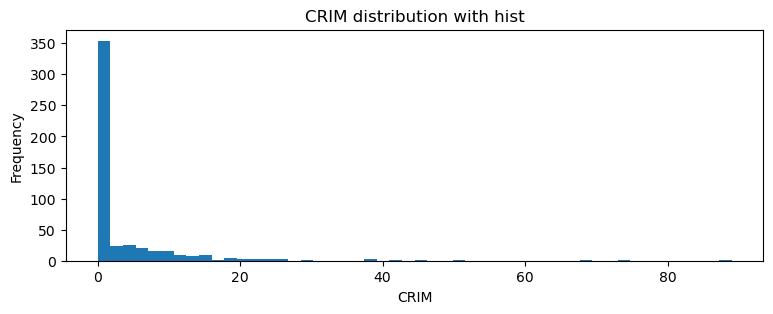

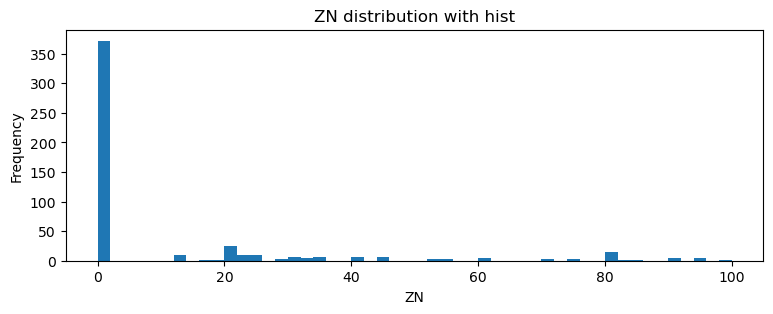

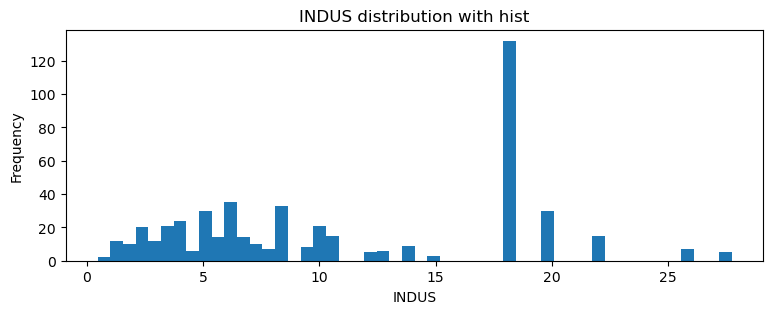

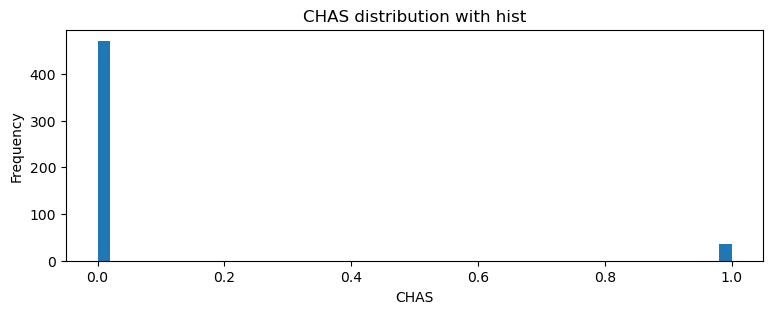

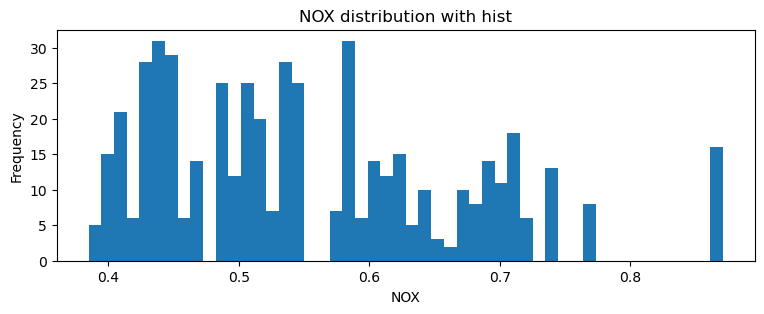

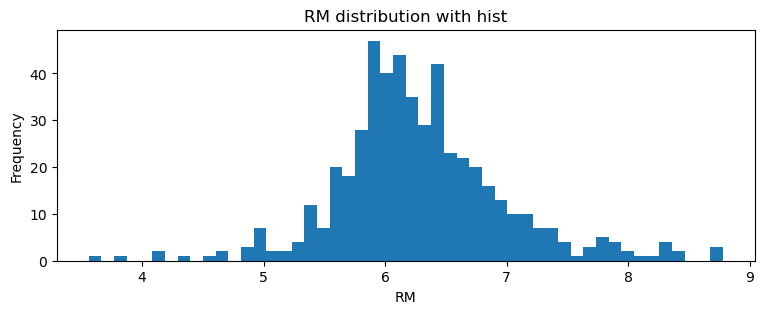

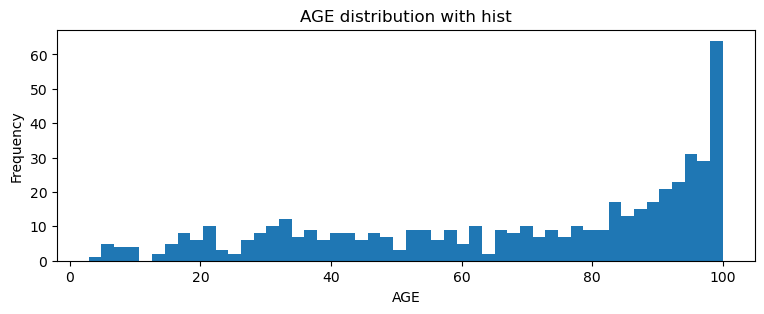

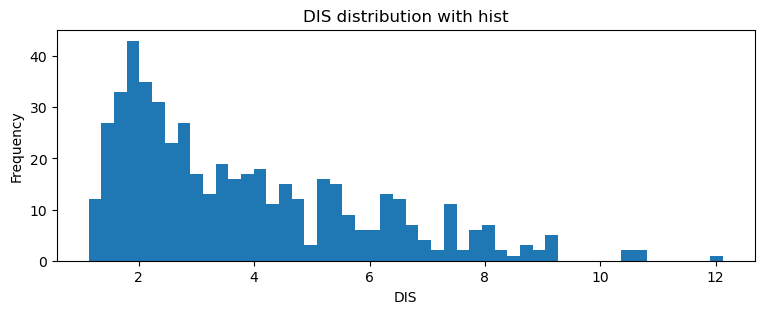

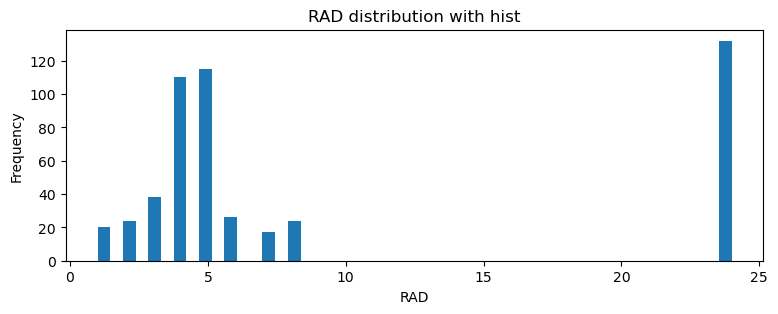

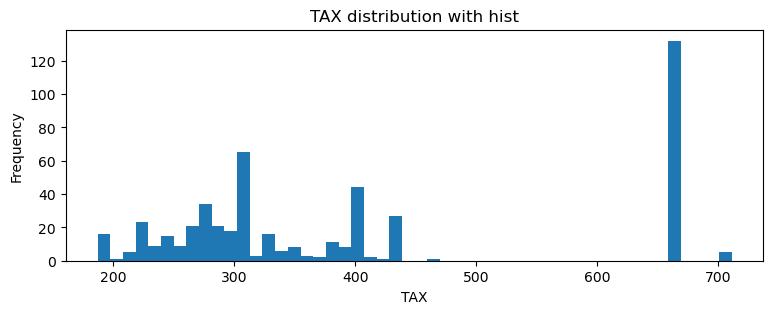

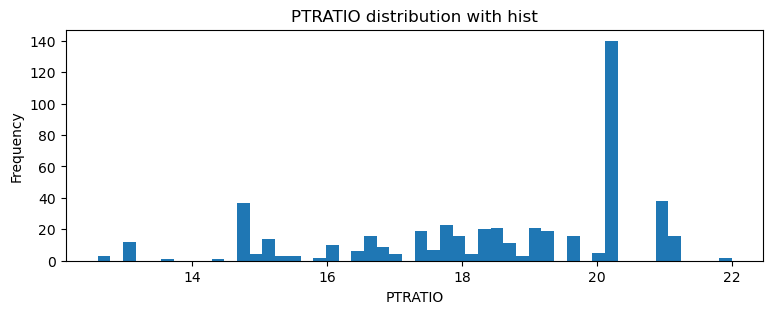

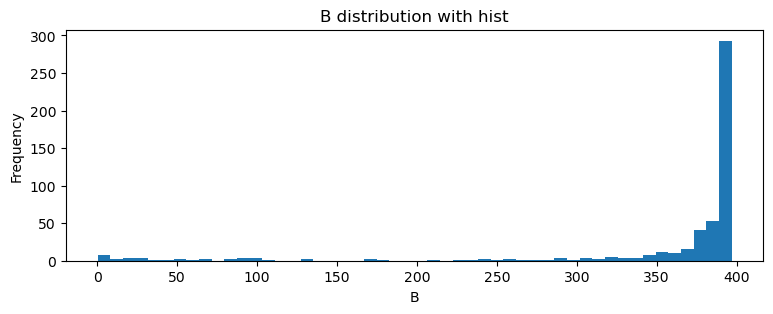

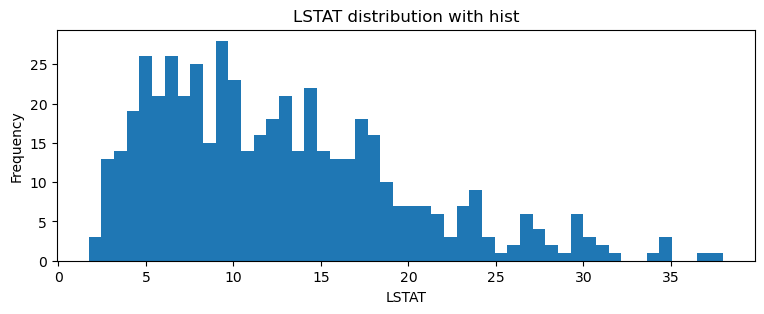

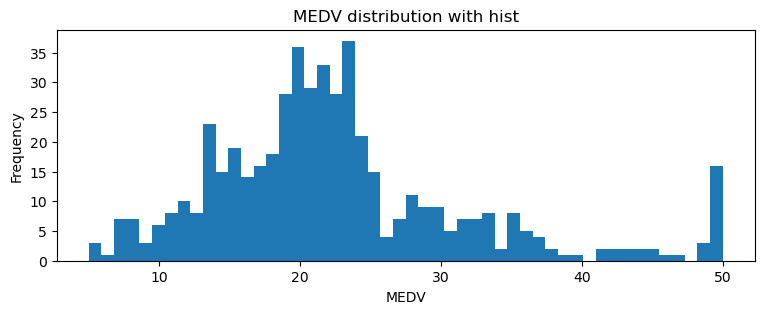

In [12]:
for i in df:
    plot_hist(i)

<function matplotlib.pyplot.show(close=None, block=None)>

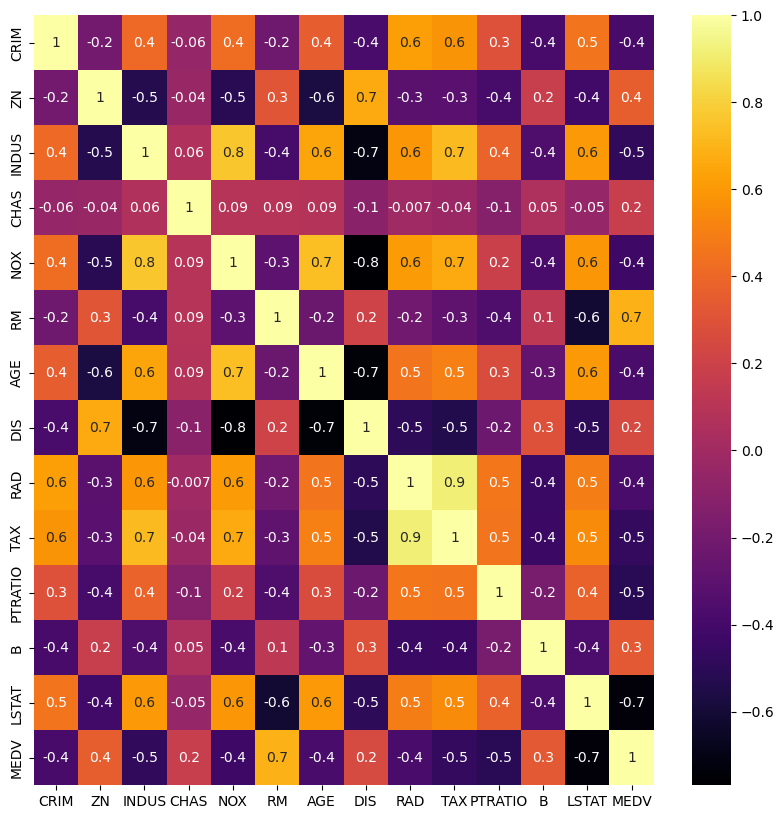

In [25]:
import seaborn as sns 

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True, fmt="0.1g", cmap = "inferno")
plt.show

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

x = df.drop(['MEDV'], axis = 1)
y = df['MEDV']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Model training and cross validation

In [38]:
# initialize and train the linear regression model

model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [39]:
cv_pred = model.predict(x_test_scaled)
cv_mse = mean_squared_error(y_test, cv_pred)
print(f"cross validation mean squared error: {cv_mse: .4f}")

cross validation mean squared error:  33.4490


In [42]:
# calculate r-squared coefficient of determination

r2 = r2_score(y_test, cv_pred)
print(f'r squrared: {r2:.4f}')

r squrared: 0.5892


In [44]:
# create a dataframe with actual and predicted values

results_df = pd.DataFrame({
    'Actual Values' : y_test.values,
    'Predicted Values': cv_pred
})

results_df.head(10)

,Actual Values,Predicted Values
0,22.6,24.889638
1,50.0,23.721411
2,23.0,29.364999
3,8.3,12.122386
4,21.2,21.443823
5,19.9,19.283444
6,20.6,20.496475
7,18.7,21.360993
8,16.1,18.896712
9,18.6,19.928066


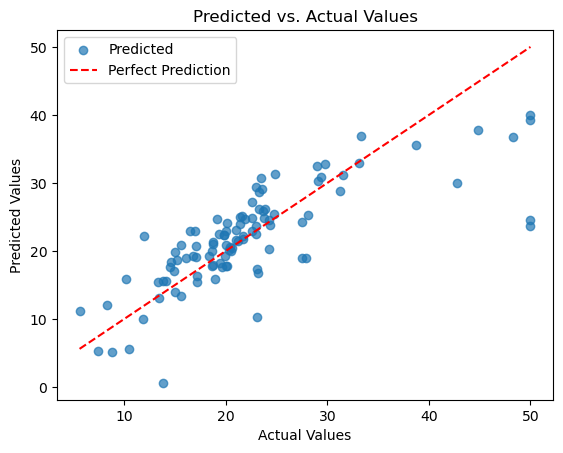

In [50]:
# Plotting the linear regression line
plt.scatter(y_test, cv_pred, alpha=0.7, label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.show()

In [51]:
# Make predictions on unseen data 
new_data = np.array([[0.02731, 18.0, 2.31, 0, 0.538, 6.575, 65.2, 4.0900, 1, 296.0, 15.3, 396.90, 4.98]])
new_data_scaled = scaler.transform(new_data)
predicted_value = model.predict(new_data_scaled)
print(f"Predicted Value: {predicted_value[0]:.2f}")

Predicted Value: 30.50
